## Pytorch work flow

In [ ]:
what_we_covering = {1:"data (prepare and load)",
                      2:"build model",
                      3:"fitting the model to data (training)",
                      4:"making predictions and evaluting a model(inference)",
                      5:"saving and loading a model",
                      6:"Putting it all together"}
what_we_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model(inference)',
 5: 'saving and loading a model',
 6: 'Putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all pf Pytorch's building blocks for neural networkd
import matplotlib.pyplot as plt

# check Pytorch version
torch.__version__

'2.2.1+cu121'

### 1 Data (preparing and loading)

Data can be almost anything in machine learnig
* Excel speadsheet
* Image of any kind
* videos (YouTube has lots of data)
* Audio like songs or podcasts
* Text
* DNA

Machine Learning is a game of two parts:-

  1. Get data into a numerical representation.

  2.Build a model to learn patterns in that numerical representation.

To Showcase this, let's create some **Known** data using the linear regression forumla.

we'll use a linear regression formula to make a straight line with known **Parameters**

## Splitting the data into training and test set(one of the most important concepts in machine learning in general)

let's create a training and test set with our data.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
# create a train/test split
train_split = int(0.8*len(X))
X_train , y_train = X[:train_split] ,y[:train_split]
X_test , y_test= X[train_split:] ,y[train_split:]

len(X_train) , len(y_train) ,len(X_test) , len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"



In [ ]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):

  """
  Plots training data test data and compare predictions."""
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data,train_label,c='b',s=4,label="Training data")
  #plot test data in green
  plt.scatter(test_data , test_label, c="g",s=4, label = "Testing data")

  # Are there Predictions?
  if predictions is not None:
    # plot the predicitons if they exist
    plt.scatter(test_data,predictions,c="r",s=4, label = "Predictions")
    # show the legends
  plt.legend(prop={"size": 14})

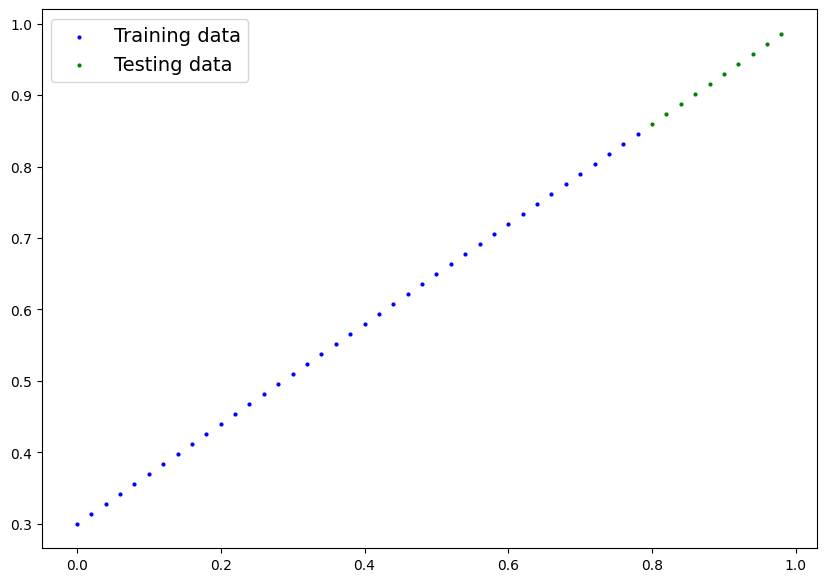

In [ ]:
plot_predictions()

## 2. build model

our first Pytorch  model

what our model does:
 * start with random values (weight & bias)
 * look at training data and adjust the random values to better represent
 (or get closer to) the ideal values (the weights and bias values we used to create the data )

How does it do so ?

Through two main algorithms:

1.Gradient descent

2.Backpropagation

In [ ]:
## Create linear regression model class
class LinearRegressionModel(nn.Module): ## <-- almost every thing in Pytorch  inherits from nn.Module
  def __init__(self):
    super().__init__()
    # initalize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                             dtype=torch.float))
    #
    # forward method to define thecomputation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor: # <- "x" is the input data
      return self.weights * x + self.bias # this is the linear regresson formula


## Pytorch model building essentials

* torch.nn - contains of the buildings for Computational graphs(neural networks can be considered a computational graph).
* torch.nn.Parameters -what parametes should our model  try and learn, often a pytorch layer fro torch.nn will set this  for us.
* torch.nn.Module - the base class for all neural network , if you subclass it you should overwrite forward().
* torch.optim - this where the optimizers in Pytorch live , they will help with gradient descent.
* def forward() - All nn.Modue subclass required you to overwrite  forward (),this method defines what happens in the forward computation.


## checking the contents of  pytorch model
* Now we have created a model let's see what's inside.
* so we can check our model Parameters or what's inside our model using .`Parametes()`

In [ ]:
 # create a random seed
import torch
torch.manual_seed(42)

# create an instance of the model (this is a sub class of nn.module)
model_0 = LinearRegressionModel()
# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight , bias

(0.7, 0.3)

## Making prediction using `torch.inference_mode()`
* To check our models predictive power let's see how well it predicts `y_test` based on `x_test`.
* when we pass data through our model it's going to run it through the `forward()` method.

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
## Make predictions with model
# with torch.inference_mode():
#   y_pred = model_0(X_test)
# y_pred

# you can also do something similar with torch.no_grad(),however inference_mode() is perferd.
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

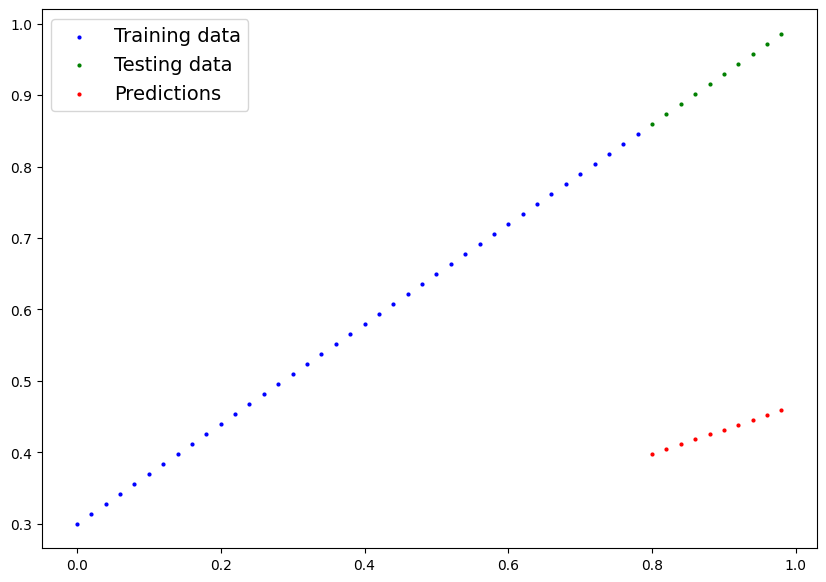

In [ ]:
plot_predictions(predictions=y_preds)

## 3  Training model
* the whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* Parameters.

* or in other word from a poor represntation of the data.

* one way to measure how poor or how wrong your models predictions are is to use a loss function.
* Note : loss function also called cost function or criteira in different areas. for  our case ,we are going to refere to it as a losss function.
** Loss function ** :- to measure how wrong your model's  predictions are to the ideal o/p , lower is better .

**Optimizer** :- Takes into account the loss of a model and adjust the model's parameters( eg:- weights & bias ) in our case to improve loss function.

  * inside the optimizer you'll often have to set how parameters :-

    * `params` :- the model parameters you'd like to optimize for example `params=model_0.parameters()`.

    * `learning rate(lr)`:- the learning rate is a hyperparameters that defines how big/small the optimizer changes the parameters with each step (a small learning rate results in small changes ,a large learning rate results in large changes).


And Specifically for Pytorch , we needs:
* A trainig loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
## set up a loss function
loss_fn = nn.L1Loss()
#setup an optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # lr -> learning rate is possibly the most important  hyperparameter you can set

Q:- which loss fucntion and optimizers should use ?

A:- This will be Problem specific .But with experience we can get idea of what works and doesn't with particular problem set.

For example for a regression problem a loss function of `nn.L1Loss()`and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifiying whether a photo is of a dog or cat we likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

## Building a training loop and testing loop in pytorch

A couple of thing we need in a training loop

0.loop through the data.

1.forward pass(this involves data moving through our models `forward()` functions)to make predictions on data - also called  forward propagation.

2. calculate the loss  (compare forward propagation predictions to ground truth lables).
3.Optimizers zero grad.
4.Loss backward - move backward through the network to calulate the gradient of each of the parameters of our model with respect to the loss ( **back propagation**).
5.Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**).


In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data   (this is a hyperparameters  because we have to set it  )
epochs = 200

# Track  different values
epoch_count = [ ]
loss_values = [ ]
test_loss_values = [ ]

### Training
#0 Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch  sets all parameters  that requires gradients to  requires gradients

   # 1. Forward pass
  y_pred = model_0(X_train)
   # 2 .calculate the loss
  loss = loss_fn(y_pred,y_train)
  # print(f"Loss : {loss}")
  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4 . Perform backpropagation on the loss with respect to the parameters of the model.
  loss.backward()

  # 5 .step the optimizer (perform gradient descent )
  optimizer.step( )  # by default  how the optimizer changes will accumlumate through the loop so we have to zero them above in step3 for yhe next iterationof the loop

## Testing
  model_0.eval() # trun off different settings in the model not needed for evalution/testing (drop out / batch norm layers)
  with torch.inference_mode(): # turn off gradient tracking  & a couple more things behind the scenes
    # with torch.no_grad(): # you may also see  torch.no_grad() in  older pytorch  code
    # 1. DO the forward pass
    test_pred = model_0(X_test)

    # 2 calculate the loss
    test_loss = loss_fn(test_pred,y_test)


  if epoch % 10 == 0:
    print( )
    print("**********************************************")
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | loss :{loss} | Test loss :{test_loss}")

    ## Print out model state_dict()
    print(model_0.state_dict())


**********************************************
Epoch: 0 | loss :0.31288138031959534 | Test loss :0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

**********************************************
Epoch: 10 | loss :0.1976713240146637 | Test loss :0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])

**********************************************
Epoch: 20 | loss :0.08908725529909134 | Test loss :0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])

**********************************************
Epoch: 30 | loss :0.053148526698350906 | Test loss :0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])

**********************************************
Epoch: 40 | loss :0.04543796554207802 | Test loss :0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])

*****************************************

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

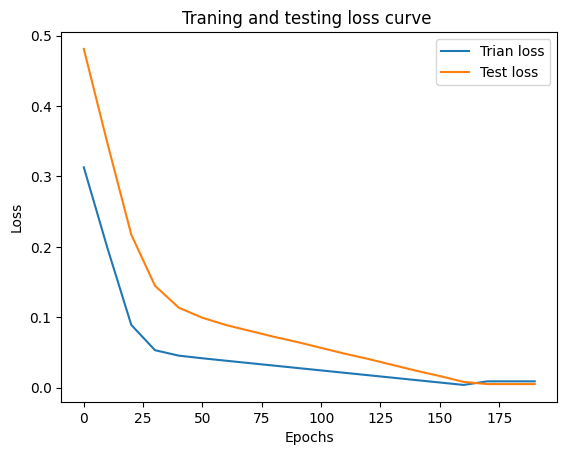

In [ ]:
## Plot the loss curve
plt.plot(epoch_count , np.array(torch.tensor(loss_values).cpu().numpy()) ,label = "Trian loss")
plt.plot(epoch_count , test_loss_values ,label = "Test loss")
plt.title("Traning and testing loss curve ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
print(f"Epoch count:{epoch_count} \n| loss values:{loss_values} \n| test loss :{test_loss_values}")

Epoch count:[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190] 
| loss values:[tensor(0.3129, grad_fn=<MeanBackward0>), tensor(0.1977, grad_fn=<MeanBackward0>), tensor(0.0891, grad_fn=<MeanBackward0>), tensor(0.0531, grad_fn=<MeanBackward0>), tensor(0.0454, grad_fn=<MeanBackward0>), tensor(0.0417, grad_fn=<MeanBackward0>), tensor(0.0382, grad_fn=<MeanBackward0>), tensor(0.0348, grad_fn=<MeanBackward0>), tensor(0.0313, grad_fn=<MeanBackward0>), tensor(0.0279, grad_fn=<MeanBackward0>), tensor(0.0245, grad_fn=<MeanBackward0>), tensor(0.0210, grad_fn=<MeanBackward0>), tensor(0.0176, grad_fn=<MeanBackward0>), tensor(0.0142, grad_fn=<MeanBackward0>), tensor(0.0107, grad_fn=<MeanBackward0>), tensor(0.0073, grad_fn=<MeanBackward0>), tensor(0.0039, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>)] 
| test loss :[tensor(0.4811), tensor(0.3464), tensor(0.2173),

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
weight, bias

(0.7, 0.3)

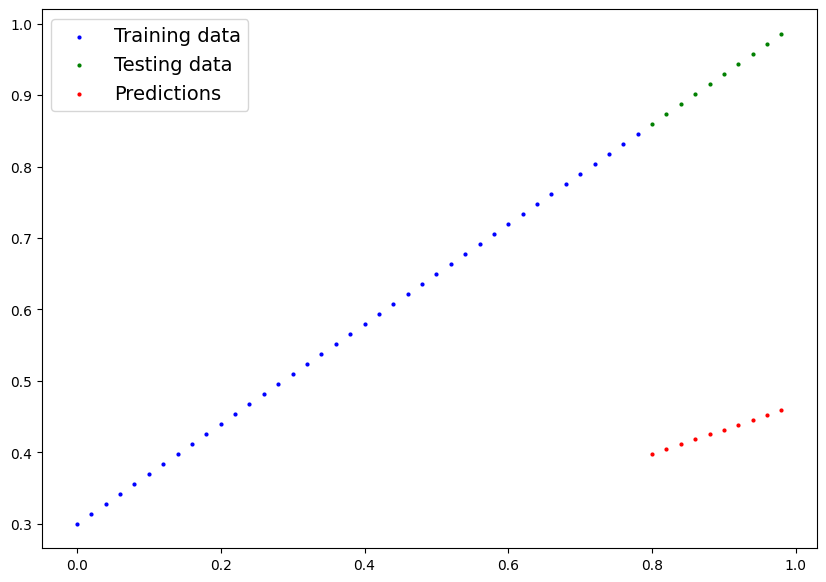

In [ ]:
plot_predictions(predictions=y_preds)

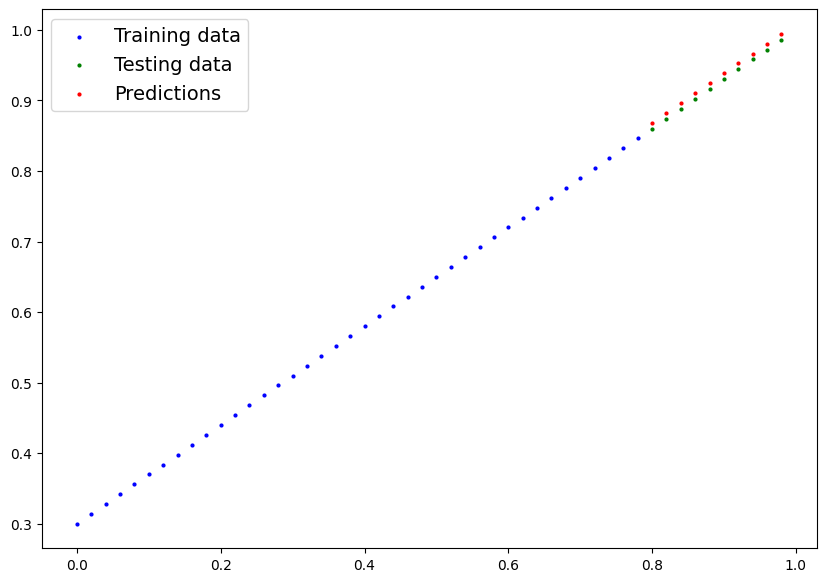

In [ ]:
plot_predictions(predictions=y_preds_new)

## Saving a Model in Pytorch

There are three main methods you should about for saving and loading models in Pytorch.

1.`torch.save()`- allow you to save a Pytorch object in Python's a pickel format.

2`torch.load()` - allow you load a saved pytorch object .

3.`torch.nn.Module.load_state_dict()` - allow to load a mode's saved state dictionary .

In [ ]:
# saving Pytorch model
from pathlib import Path  # The pathlib module in Python provides a convenient and object-oriented way to work with file system paths.

# 1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True ,exist_ok = True)

# 2 Create  model save path
MODEL_NAME = '2_Pytorch_work_flow_model_0.pth'

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
            f = MODEL_SAVE_PATH)

saving model to :models/2_Pytorch_work_flow_model_0.pth


In [ ]:
!ls -l models # this command lists the contents of a directory or file named "models" in your environment, likely a Python notebook.

total 4
-rw-r--r-- 1 root root 1680 Mar 14 16:54 2_Pytorch_work_flow_model_0.pth


## loading a Pytorch Model

since we saved our models `state_dict()` rather the entire model,we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to  instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some Predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# compare loaded model preds with original models preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6 . Putting it all together

Let's go back through the steps above and see it all in one place.

In [ ]:
# Import
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

Cretae  device-agnostic code.

This means if we have got access to a GPU , our code will use it ( for potentially faster computing ).

If no GPU is available,the code will default to using CPU

In [ ]:
# setup device agonstic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'using device : {device}')

using device : cuda


## 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y= Weights*x+bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X= torch.arange(start,end,step).unsqueeze(dim=1 ) # without squeeze error wil pop
y = weight * X +bias
X[:10] , y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
## split data
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train) , len(y_train) ,len(X_test),len(y_test)

(40, 40, 10, 10)

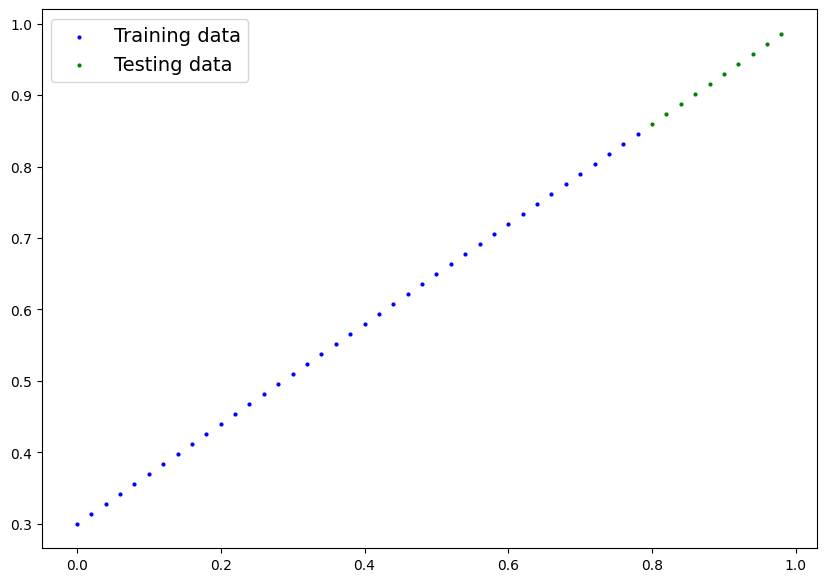

In [ ]:
# Plot the data
# Note : if you don't have the plot_prediction() function loaded this will error
plot_predictions(X_train,y_train,X_test,y_test)

## 6.2 building a Pytorch linear Model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    ## use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                out_features=1)
  def forward(self,x :torch.Tensor) ->torch.Tensor:
    return self.linear_layer(x)
#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1 , model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5] , y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
##  checking the  model current device
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 Training
For Training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
## setup loss function
loss_function = nn.L1Loss( ) # same as MAE

# set up optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [ ]:
# let's Write a training loop
torch.manual_seed(42)
epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epochs in range(epochs):
  model_1.train()
  # 1.forward pass
  y_pred = model_1(X_train)

  # 2.calculate zero grad
  loss = loss_fn(y_pred,y_train)

  # 3.optimizer zero grad
  optimizer.zero_grad()

  # 4 perform backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred , y_test)

  # print
  if epochs %10 == 0:
    print(f"Epoch:{epochs} | Loss :{loss} |  Test Loss:{test_loss}")

Epoch:0 | Loss :0.5551779866218567 |  Test Loss:0.5739762187004089
Epoch:10 | Loss :0.439968079328537 |  Test Loss:0.4392664134502411
Epoch:20 | Loss :0.3247582018375397 |  Test Loss:0.30455657839775085
Epoch:30 | Loss :0.20954833924770355 |  Test Loss:0.16984669864177704
Epoch:40 | Loss :0.09433845430612564 |  Test Loss:0.03513690456748009
Epoch:50 | Loss :0.023886388167738914 |  Test Loss:0.04784907028079033
Epoch:60 | Loss :0.019956795498728752 |  Test Loss:0.045803118497133255
Epoch:70 | Loss :0.016517987474799156 |  Test Loss:0.037530567497015
Epoch:80 | Loss :0.013089174404740334 |  Test Loss:0.02994490973651409
Epoch:90 | Loss :0.009653178043663502 |  Test Loss:0.02167237363755703
Epoch:100 | Loss :0.006215683650225401 |  Test Loss:0.014086711220443249
Epoch:110 | Loss :0.00278724217787385 |  Test Loss:0.005814164876937866
Epoch:120 | Loss :0.0012645035749301314 |  Test Loss:0.013801801018416882
Epoch:130 | Loss :0.0012645035749301314 |  Test Loss:0.013801801018416882
Epoch:140 

In [ ]:
 model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight ,bias

(0.7, 0.3)

### 6.4 Making and evaluting Predictions

In [ ]:
# Turn model into evalution mode
model_1.eval()
 # Make Predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

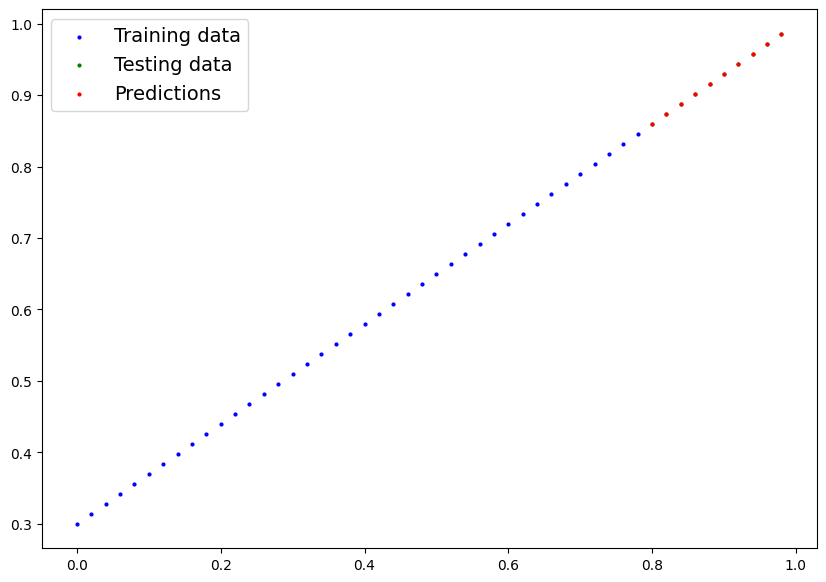

In [ ]:
## check out our model Predictions visually
plot_predictions(predictions = y_preds.cpu())

## 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1.create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH  = MODEL_PATH / MODEL_NAME


# 3 . Save the model state dict
print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f =MODEL_SAVE_PATH )

Saving model to :models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
## load a pytorch

# Create a new instance of linear regression modelV2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
## Evalute loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')